# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

The goal of this experiment is to figure out which combination of shoe design features leads to the most comfortable running experience. The manufacturer is testing different materials and features to find the best possible combination that improves comfort for competitive athletes.

2.  Specify the outcome variable and how it is measured.

The outcome variable in this experiment is comfort rating, which is a subjective score from 1 to 10, where 1 means very uncomfortable and 10 means extremely comfortable. It's measured by asking each athlete to rate the shoes after running for 30 minutes on a treadmill.

3.  Specify the independent variables. What lurking variables may be present?

A: Sole Material
Level (-): Standard EVA foam
Level (+): Advanced gel-infused foam
B: Insole Thickness
Level (-): 3mm
Level (+): 6mm
C: Fabric Breathability
Level (-): Standard woven fabric
Level (+): High-performance mesh
Possible lurking variables (things that could influence results but aren't being directly tested) might include:
Each runner’s personal preference or bias
Differences in body weight or running form
Fatigue or performance on the treadmill
The time of day or order in which the shoes are tested

4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

 A full factorial design tests every possible combination of all factor levels. In this case, with three factors each at two levels, that's a 2³ = 8 run design.
A 2^k factorial design is a type of full factorial where each factor has just two levels. It's commonly used for screening experiments because it's efficient and helps to identify which factors (and interactions) are important.
In this case, a 2³ factorial design is ideal because it keeps the experiment manageable (only 8 combinations), while still giving useful insights into both main effects and interactions.

5.  State the sets of null and alternative hypotheses for this experiment.

We can set up hypotheses for each factor and interaction. Here’s how it would look:
For each main effect (A, B, C):
H₀: There is no effect of [factor] on comfort.
H₁: There is a significant effect of [factor] on comfort.
For interactions (e.g., AB, AC, BC, ABC):
H₀: There is no interaction effect between the factors.
H₁: There is a significant interaction effect between the factors.
The hypotheses can be tested using ANOVA or linear models.

6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "christinatalerico13"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

print("💡 Please fork the repo to your own account and update 'github_username' above.")


# Set Today's Directory #

today_dir = "Assignments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


📥 Cloning repo from https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git
💡 Please fork the repo to your own account and update 'github_username' above.
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments


/tmp/ipython-input-4012744986.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df.groupby(['sole_material', 'insole_thickness', 'breathability'])['comfort'].agg(['mean', 'std', 'count'])
/tmp/ipython-input-4012744986.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='sole_material', y='comfort', ax=axes[0], ci='sd')
/tmp/ipython-input-4012744986.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='insole_thickness', y='comfort', ax=axes[1], ci='sd')


Summary Statistics by Group:

                                                   mean       std  count
sole_material insole_thickness breathability                            
EVA           3mm              Mesh            6.368107  1.208337      3
                               Woven           6.573854  0.538350      3
              6mm              Mesh            7.032079  0.916897      3
                               Woven           8.400512  0.127263      3
Gel           3mm              Mesh            8.294237  0.562753      3
                               Woven           8.529663  1.670397      3
              6mm              Mesh            8.322450  1.439997      3
                               Woven          11.028033  0.166786      3


/tmp/ipython-input-4012744986.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='breathability', y='comfort', ax=axes[2], ci='sd')


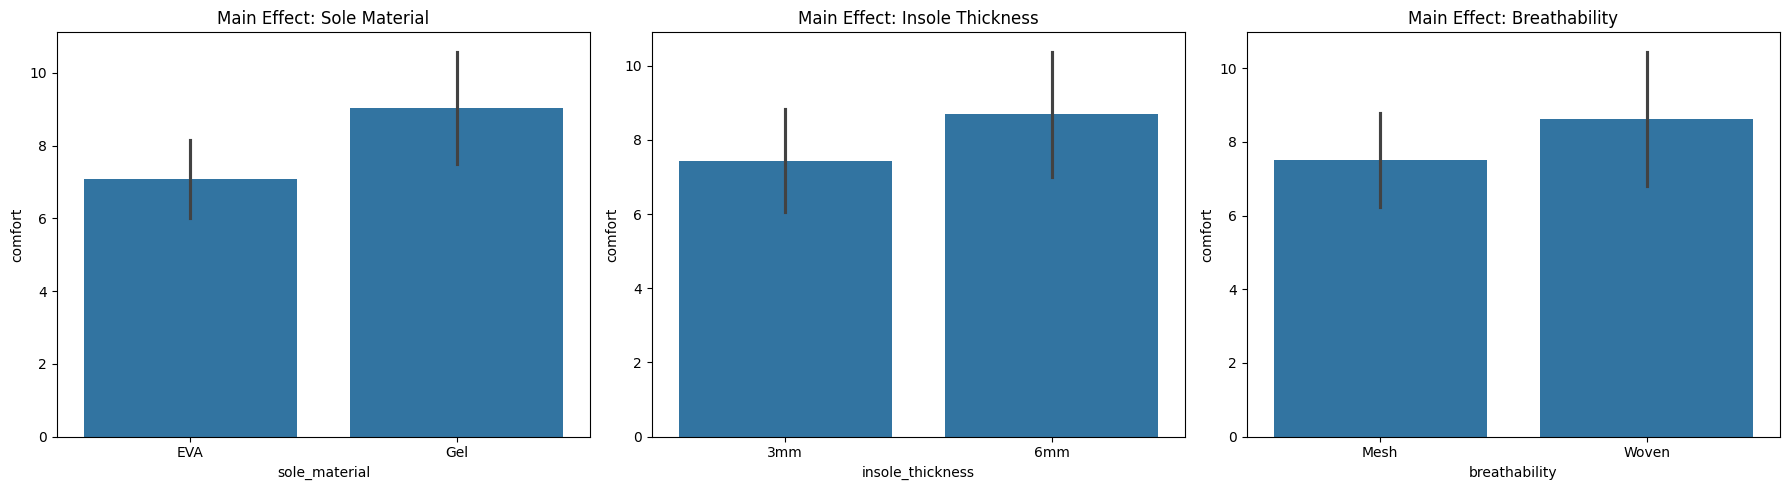

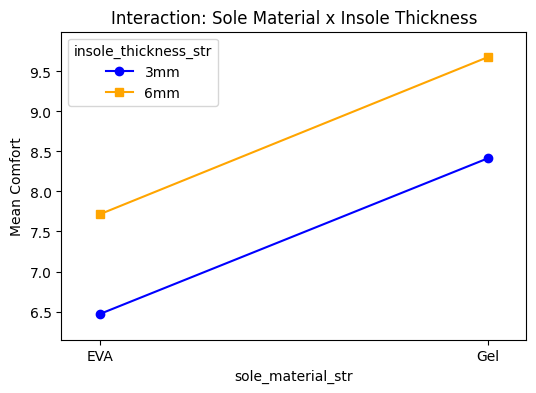

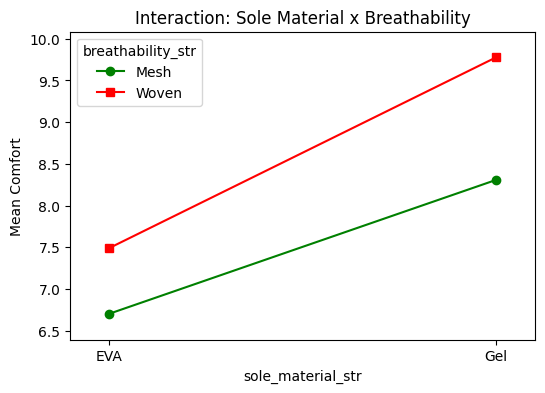

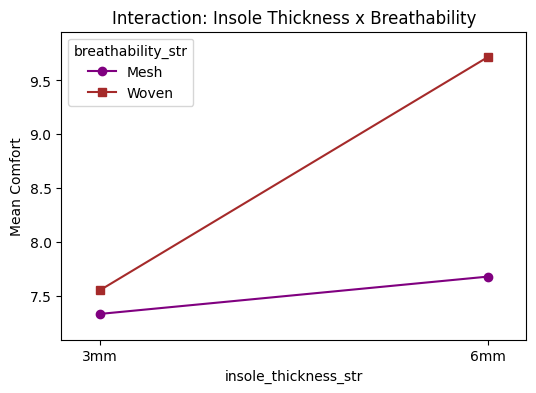

In [2]:
## Question 6 Code ##

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Step 2: Load the Excel file from your directory
file_path = '/content/STAT-7220-Applied-Experimental-Design/Assignments/HW3/Shoe Comfort Experiment.xlsx'
df = pd.read_excel(file_path)

# Step 3: Convert factors to categorical or string for plotting
df['sole_material'] = df['sole_material'].astype('category')
df['insole_thickness'] = df['insole_thickness'].astype('category')
df['breathability'] = df['breathability'].astype('category')

df['sole_material_str'] = df['sole_material'].astype(str)
df['insole_thickness_str'] = df['insole_thickness'].astype(str)
df['breathability_str'] = df['breathability'].astype(str)

# Step 4: Summary statistics
summary_stats = df.groupby(['sole_material', 'insole_thickness', 'breathability'])['comfort'].agg(['mean', 'std', 'count'])
print("Summary Statistics by Group:\n")
print(summary_stats)

# Step 5: Main effects bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x='sole_material', y='comfort', ax=axes[0], ci='sd')
axes[0].set_title('Main Effect: Sole Material')

sns.barplot(data=df, x='insole_thickness', y='comfort', ax=axes[1], ci='sd')
axes[1].set_title('Main Effect: Insole Thickness')

sns.barplot(data=df, x='breathability', y='comfort', ax=axes[2], ci='sd')
axes[2].set_title('Main Effect: Breathability')

plt.tight_layout()
plt.show()

# Step 6: Interaction Plots

# Sole Material x Insole Thickness
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['sole_material_str'], df['insole_thickness_str'], df['comfort'],
                 ax=ax, colors=['blue', 'orange'], markers=['o', 's'])
ax.set_title("Interaction: Sole Material x Insole Thickness")
ax.set_ylabel("Mean Comfort")
plt.show()

# Sole Material x Breathability
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['sole_material_str'], df['breathability_str'], df['comfort'],
                 ax=ax, colors=['green', 'red'], markers=['o', 's'])
ax.set_title("Interaction: Sole Material x Breathability")
ax.set_ylabel("Mean Comfort")
plt.show()

# Insole Thickness x Breathability
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['insole_thickness_str'], df['breathability_str'], df['comfort'],
                 ax=ax, colors=['purple', 'brown'], markers=['o', 's'])
ax.set_title("Interaction: Insole Thickness x Breathability")
ax.set_ylabel("Mean Comfort")
plt.show()


7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?


In [ ]:
## Question 7 Code ##


8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?


In [ ]:
## Question 8 Code ##


9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?


In [ ]:
## Question 9 Code ##


10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?


In [ ]:
## Question 10 Code ##


11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?



## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

2.  Specify the outcome variable and how it is measured.

3.  Specify the independent variables. What lurking variables may be present?

4.  Explain the difference between a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design. Briefly comment on why the latter may be preferred in this case.

5.  State the sets of null and alternative hypotheses for this experiment.

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [ ]:
## Question 7 Code ##


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?


In [ ]:
## Question 8 Code ##


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


In [ ]:
## Question 9 Code ##

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [ ]:
## Question 10 Code ##

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [ ]:
## Question 11 Code ##

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [ ]:
## Question 12 Code ##

13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?